# Titanic Data set

In [40]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Load Dataset
data = pd.read_csv('titanic.csv')


## Data Cleaning

In [41]:
# Dataset Details:
# pclass    - Passenger Class (1st, 2nd, 3rd)
# survived  - Survival Status (0 = No, 1 = Yes)
# name      - Passenger's Name
# sex       - Gender (male/female)
# age       - Age
# sibsp     - Siblings/Spouse Count Aboard
# parch     - Parents/Children Count Aboard
# ticket    - Ticket Number
# fare      - Ticket Fare
# cabin     - Cabin Number
# embarked  - Boarding Port (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat      - Lifeboat (if survived)
# body      - Body ID (if deceased and recovered)
# home.dest - Destination

print(data.shape)
data.head()


(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
# Dropping unnecessary columns for analysis
data = data.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

print(data.shape)
data.head()


(1309, 7)


,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


In [43]:
# Checking missing values in each column
data.isnull().sum()


,0
pclass,0
survived,0
sex,0
age,263
sibsp,0
parch,0
fare,1


In [44]:
# Fill missing age values with median age based on gender
male_med = data[data['sex'] == 'male']['age'].median()
female_med = data[data['sex'] == 'female']['age'].median()

data.loc[(data['sex'] == 'male') & (data['age'].isnull()), 'age'] = male_med
data.loc[(data['sex'] == 'female') & (data['age'].isnull()), 'age'] = female_med

# Fill missing fare values with mean fare based on passenger class
data.loc[data['fare'].isnull(), 'fare'] = data.groupby('pclass')['fare'].transform('mean')

# Check remaining missing values
data.isnull().sum()


,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
fare,0


In [45]:
# Count and remove duplicate rows
print(data.duplicated().sum())
data = data.drop_duplicates()

# Display updated shape
data.shape


209


(1100, 7)

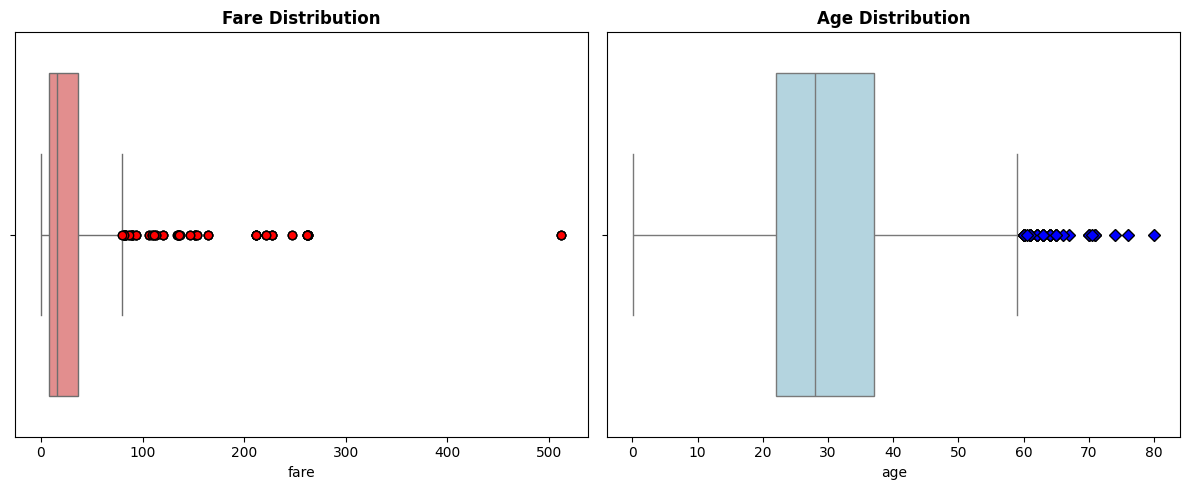

In [46]:
# Visualizing outliers using boxplots with custom colors
plt.figure(figsize=(12, 5))

# Boxplot for Fare
plt.subplot(1, 2, 1)
sns.boxplot(x=data['fare'], color='lightcoral', fliersize=6, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})
plt.title('Fare Distribution', fontsize=12, fontweight='bold')

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='lightblue', fliersize=6, flierprops={'marker': 'D', 'markerfacecolor': 'blue', 'markeredgecolor': 'black'})
plt.title('Age Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [47]:
# Checking for inconsistencies in the 'sex' column
print(data['sex'].unique())

['female' 'male']


In [48]:
# Create 'is_alone' column (1 = traveling alone, 0 = with family)
data['is_alone'] = (data['sibsp'] + data['parch'] == 0).astype(int)

# Remove 'sibsp' and 'parch' columns
data = data.drop(['sibsp', 'parch'], axis=1)

# Display updated shape and first few rows
print(data.shape)
data.head()


(1100, 6)


,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


# Univariate Analysis for the given set

In [49]:
data.head()

,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


#### i. Analyzing Age Distribution

Mean: 29.8
Median: 28.0
Standard Deviation: 13.88
Skewness: 0.45
Kurtosis: 0.44


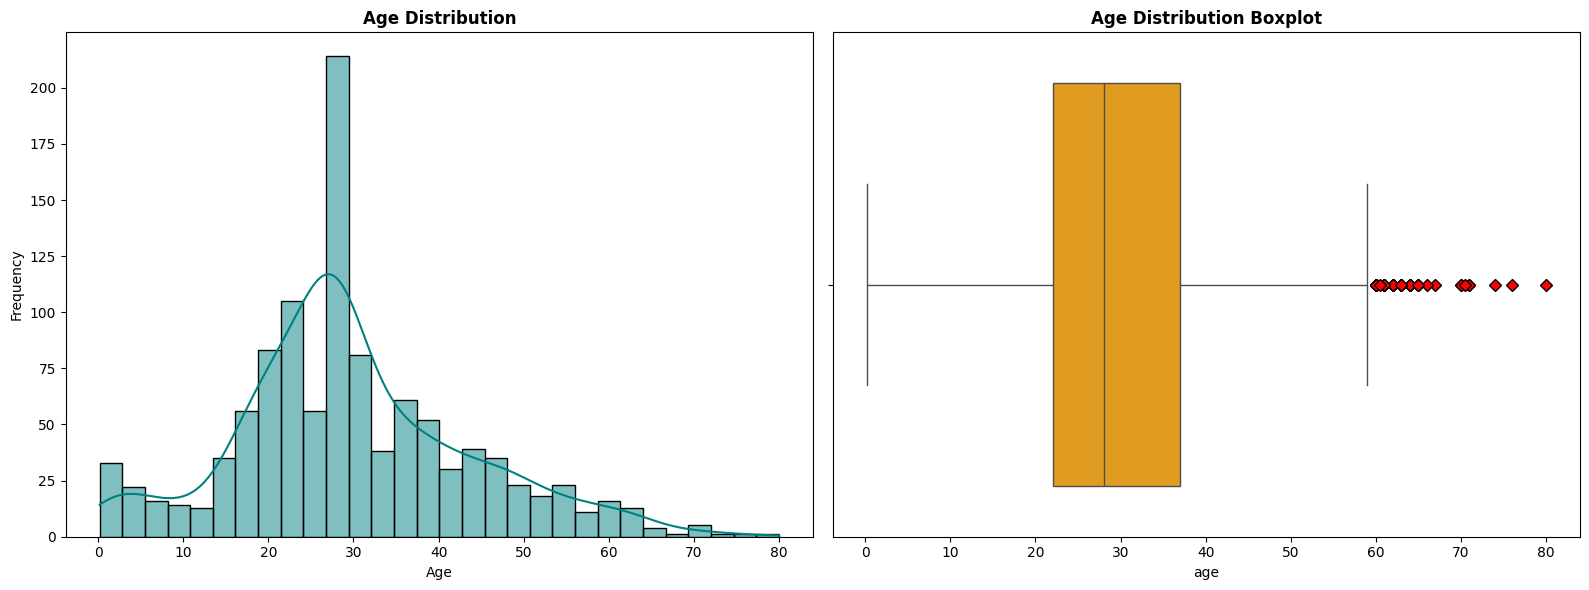

In [50]:
# Age Statistics
print('Mean:', round(data['age'].mean(), 2))
print('Median:', data['age'].median())
print('Standard Deviation:', round(data['age'].std(), 2))
print('Skewness:', round(data['age'].skew(), 2))
print('Kurtosis:', round(data['age'].kurt(), 2))

# Visualizing Age Distribution
plt.figure(figsize=(16, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, color='teal', bins=30)
plt.title('Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'], color='orange', fliersize=6,
            flierprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})
plt.title('Age Distribution Boxplot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### ii. Analyzing Fare Distribution

Mean: 36.93
Median: 16.1
Standard Deviation: 55.31
Skewness: 4.07
Kurtosis: 23.31


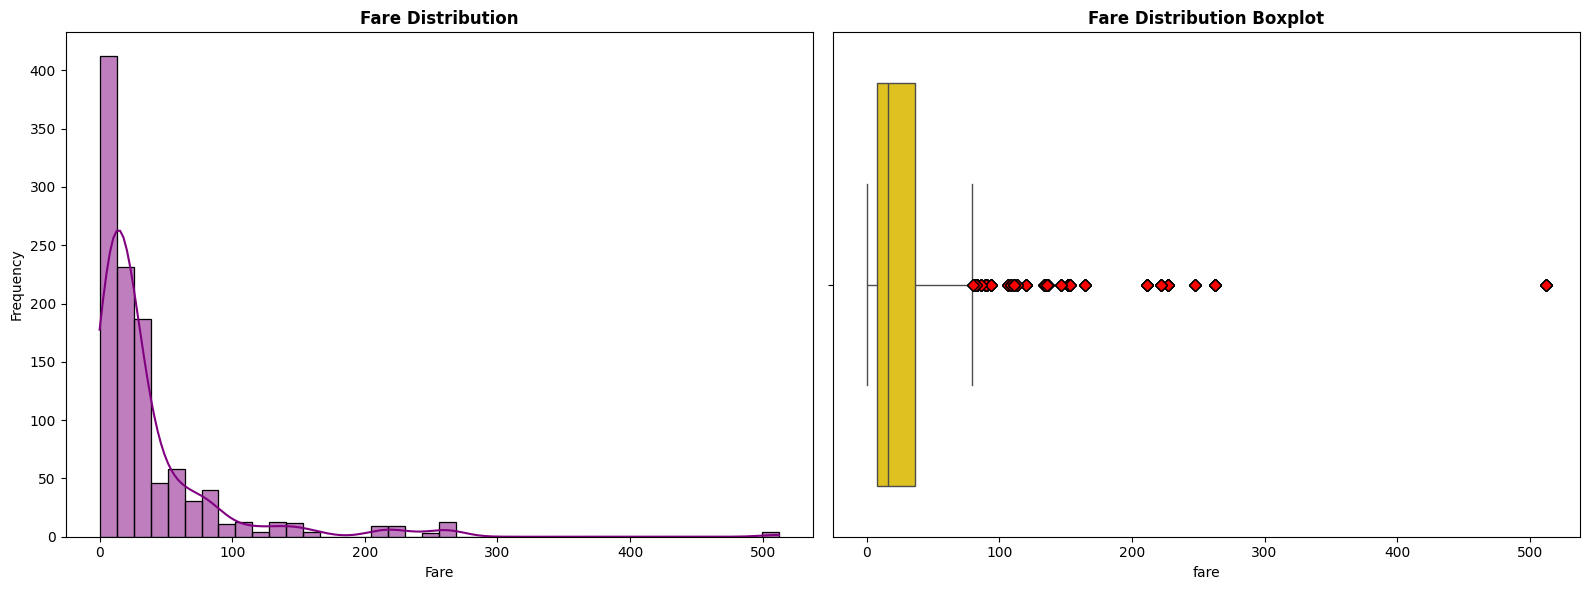

In [51]:
# Fare Statistics
print('Mean:', round(data['fare'].mean(), 2))
print('Median:', data['fare'].median())
print('Standard Deviation:', round(data['fare'].std(), 2))
print('Skewness:', round(data['fare'].skew(), 2))
print('Kurtosis:', round(data['fare'].kurt(), 2))

# Visualizing Fare Distribution
plt.figure(figsize=(16, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data['fare'], kde=True, color='purple', bins=40)
plt.title('Fare Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=data['fare'], color='gold', fliersize=6,
            flierprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'black'})
plt.title('Fare Distribution Boxplot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### iii. Analyzing Sex Distribution

Number of male passengers: 672
Number of female passengers: 428


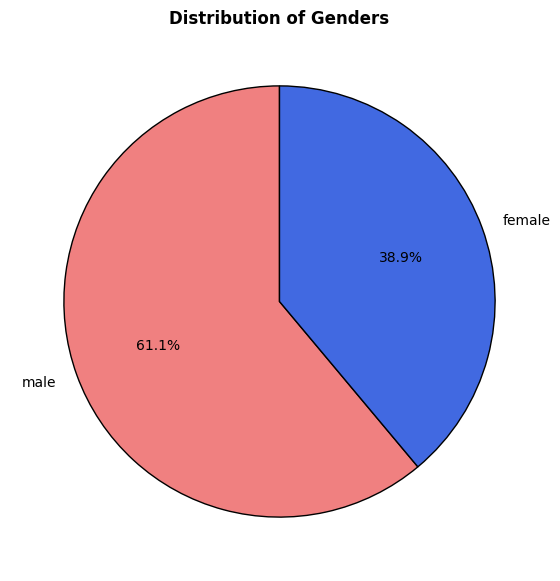

In [52]:
# Count the number of male and female passengers
sex_counts = data['sex'].value_counts()

print("Number of male passengers:", sex_counts['male'])
print("Number of female passengers:", sex_counts['female'])

# Pie chart for gender distribution
plt.figure(figsize=(7, 7))
colors = ['lightcoral', 'royalblue']  # Assigning colors to female and male
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Genders', fontsize=12, fontweight='bold')
plt.show()


#### iv. Analyzing Passenger Class Distribution

Number of passengers in 1st class: 312
Number of passengers in 2nd class: 241
Number of passengers in 3rd class: 547


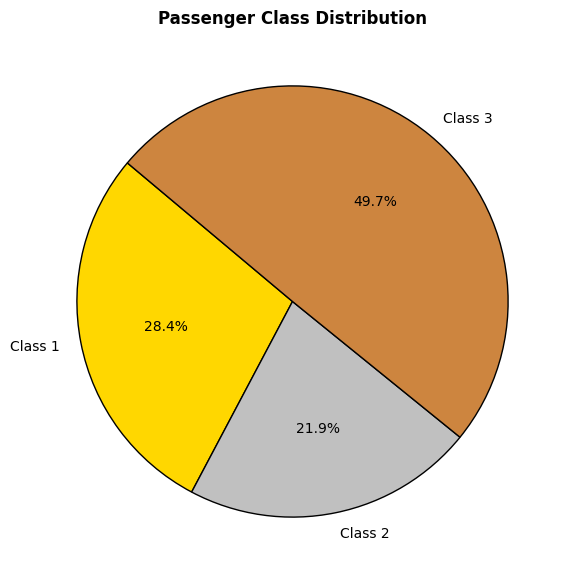

In [53]:
# Count passengers in each class
class_counts = data['pclass'].value_counts().sort_index()  # Sorting to ensure correct order

print("Number of passengers in 1st class:", class_counts[1])
print("Number of passengers in 2nd class:", class_counts[2])
print("Number of passengers in 3rd class:", class_counts[3])

# Pie chart for passenger class distribution
plt.figure(figsize=(7, 7))
colors = ['gold', 'silver', 'peru']  # Assigning colors to 1st, 2nd, and 3rd class

plt.pie(class_counts, labels=[f'Class {i}' for i in class_counts.index], autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Passenger Class Distribution', fontsize=12, fontweight='bold')
plt.show()


#### v. Analyzing Survival of Passengers

Number of passengers who survived: 464
Number of passengers who did not survive: 636


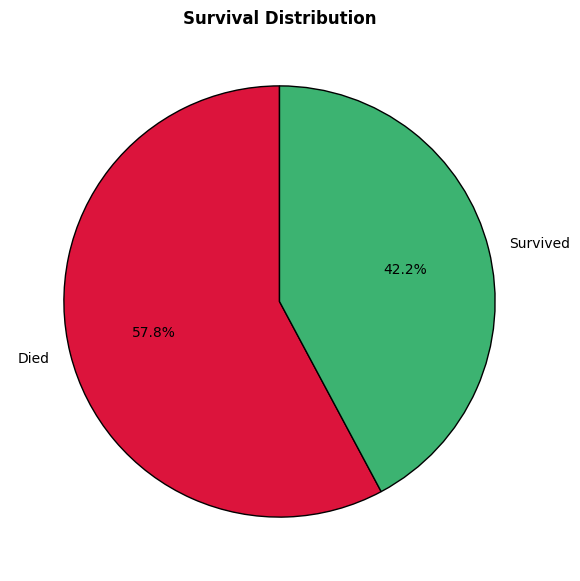

In [54]:
# Survival labels
survival_labels = ["Died", "Survived"]

# Count of survivors and non-survivors
survival_counts = data['survived'].value_counts().sort_index()  # Ensure correct order

print("Number of passengers who survived:", survival_counts[1])
print("Number of passengers who did not survive:", survival_counts[0])

# Pie chart for survival distribution
plt.figure(figsize=(7, 7))
colors = ['crimson', 'mediumseagreen']  # Red for deceased, Green for survivors

plt.pie(survival_counts,
        labels=survival_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Survival Distribution', fontsize=12, fontweight='bold')
plt.show()


#### vi. Analyzing Wether the Passenger was Alone or Not

Number of passengers who were not alone: 490
Number of passengers who were alone: 610


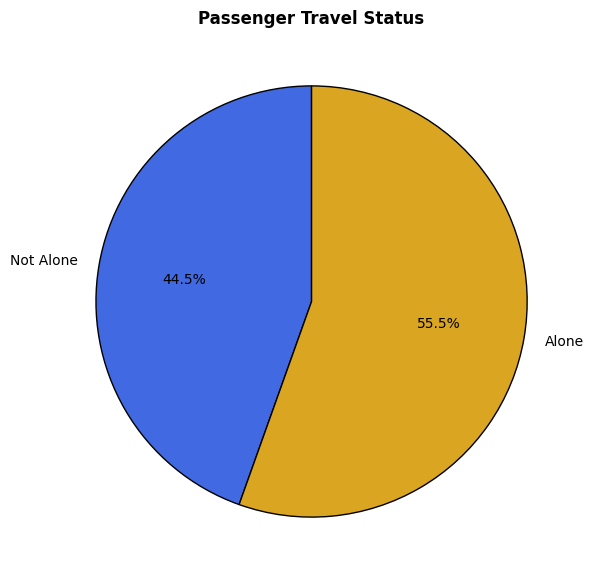

In [55]:
# Labels for passengers traveling alone or not
alone_labels = ["Not Alone", "Alone"]

# Count of passengers who were alone vs. not alone
alone_counts = data['is_alone'].value_counts().sort_index()  # Ensures correct order

print("Number of passengers who were not alone:", alone_counts[0])
print("Number of passengers who were alone:", alone_counts[1])

# Pie chart for alone distribution
plt.figure(figsize=(7, 7))
colors = ['royalblue', 'goldenrod']  # Blue for Not Alone, Gold for Alone

plt.pie(alone_counts,
        labels=alone_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Passenger Travel Status', fontsize=12, fontweight='bold')
plt.show()


# Bivariate Analysis for given data

In [56]:
data.head()

,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


#### i. Correlation Between Passenger Class and Survival

<Figure size 1000x600 with 0 Axes>

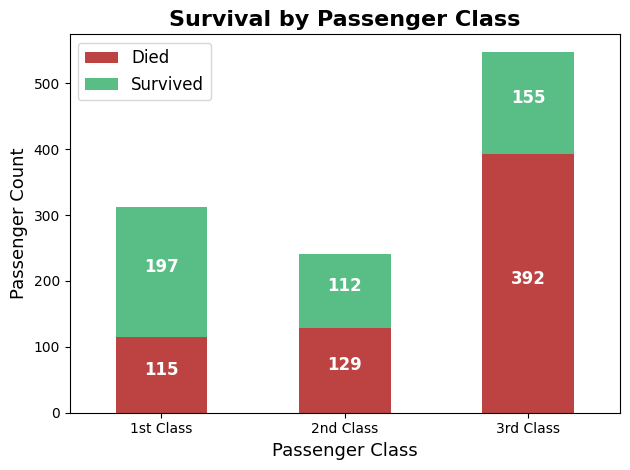

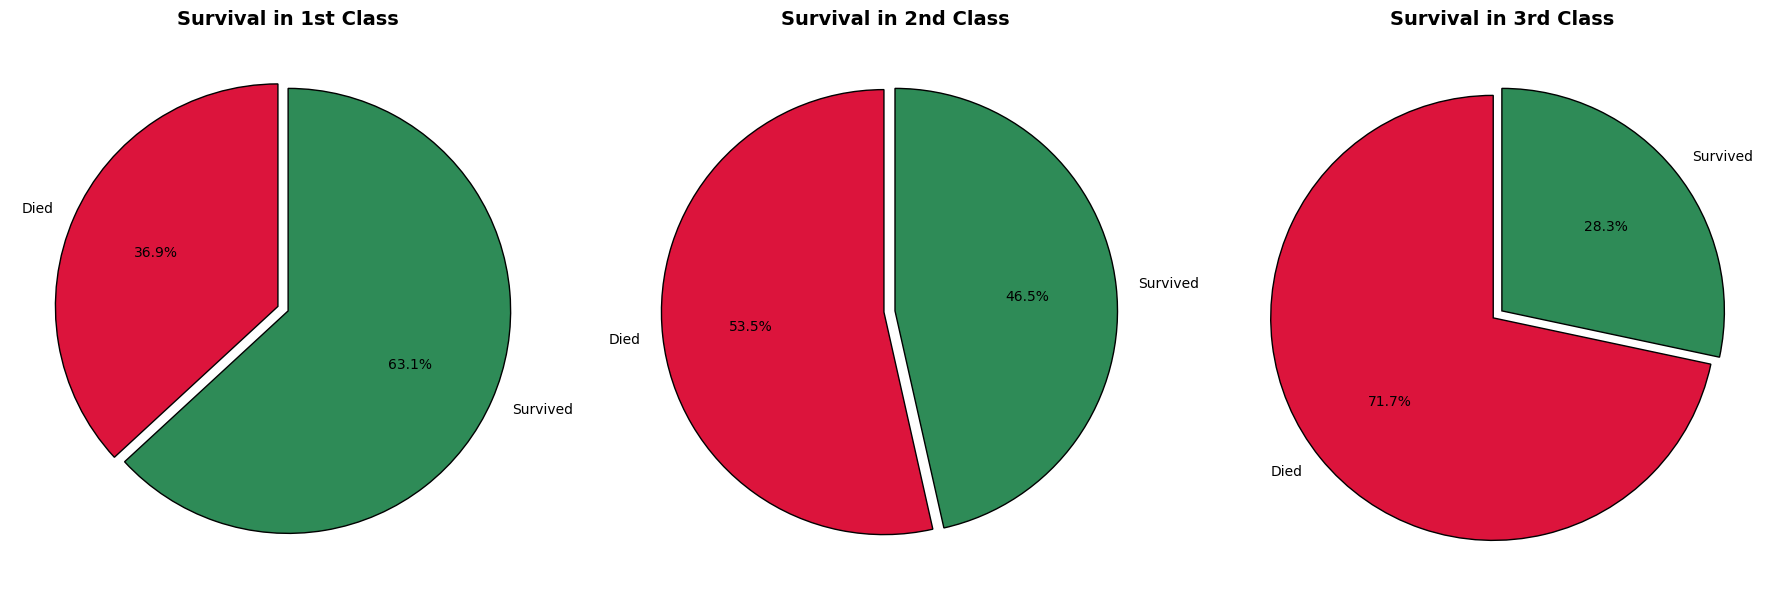

In [57]:
# Compute survival by class (crosstab)
survival_by_class = pd.crosstab(data['pclass'], data['survived'],
                                rownames=['Class'],
                                colnames=['Survived'])

# Rename columns for better readability
survival_by_class.columns = ['Died', 'Survived']

# Compute survival percentages for each class
survival_percentages = {}
for pclass in [1, 2, 3]:
    class_data = data[data['pclass'] == pclass]
    total = len(class_data)
    survived = class_data['survived'].sum()
    died = total - survived
    survival_percentages[pclass] = [died / total * 100, survived / total * 100]

# --- Bar Plot: Survival by Passenger Class ---
plt.figure(figsize=(10, 6))
colors = ['firebrick', 'mediumseagreen']  # Red for Died, Green for Survived

survival_by_class.plot(kind='bar', stacked=True, color=colors, alpha=0.85)
plt.title('Survival by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=13)
plt.ylabel('Passenger Count', fontsize=13)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(['Died', 'Survived'], fontsize=12)

# Add data labels on bars
for i, (died, survived) in enumerate(zip(survival_by_class['Died'], survival_by_class['Survived'])):
    plt.text(i, died / 2, str(died), ha='center', fontsize=12, color='white', fontweight='bold')
    plt.text(i, died + survived / 2, str(survived), ha='center', fontsize=12, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# --- Pie Charts: Survival Percentages by Class ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
classes = [1, 2, 3]
class_names = ['1st Class', '2nd Class', '3rd Class']
colors_pie = ['crimson', 'seagreen']

for i, pclass in enumerate(classes):
    axes[i].pie(survival_percentages[pclass],
                labels=['Died', 'Survived'],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors_pie,
                explode=(0.05, 0),  # Slight explosion effect for "Died"
                wedgeprops={'edgecolor': 'black'})

    axes[i].set_title(f'Survival in {class_names[i]}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Chi-square value: 101.01
p-value: 0.000000
Degrees of freedom: 2

Expected Frequencies:
             Died    Survived
Class                        
1      180.392727  131.607273
2      139.341818  101.658182
3      316.265455  230.734545
Interpretation: There is a significant relationship between passenger class and survival


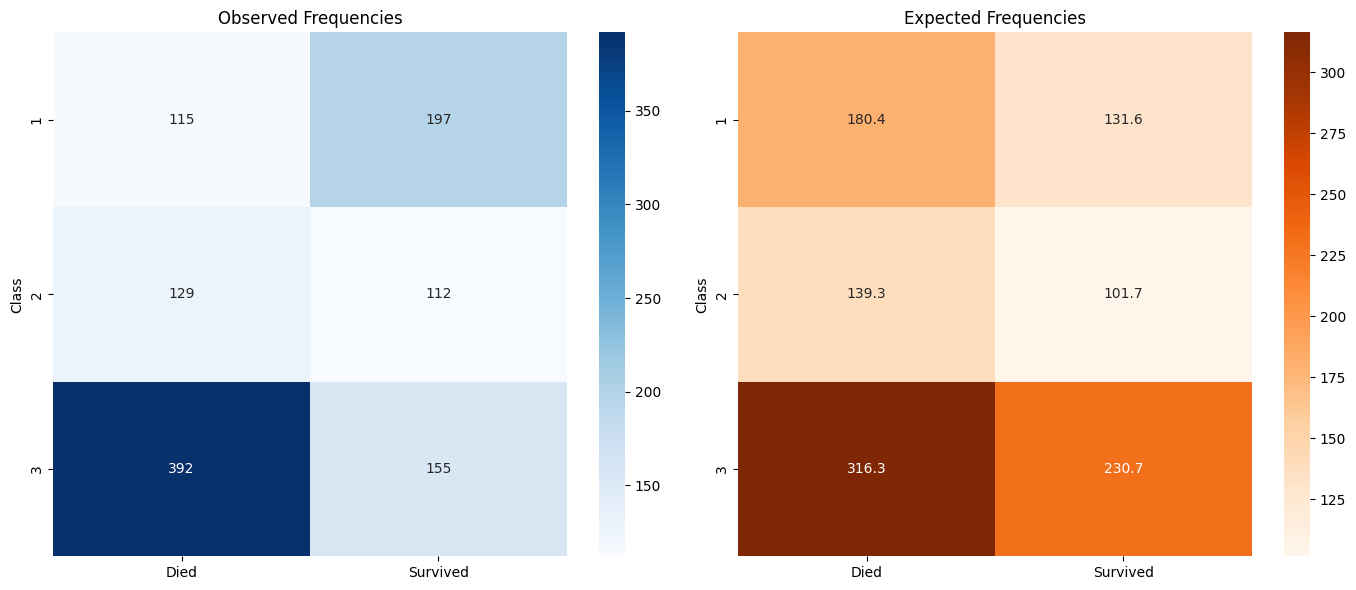

In [58]:
chi2, p, dof, expected = chi2_contingency(survival_by_class)

print(f"Chi-square value: {chi2:.2f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=survival_by_class.index, columns=survival_by_class.columns))

print("Interpretation: " + ("There is a significant relationship between passenger class and survival"
                          if p < 0.05 else
                          "There is no significant relationship between passenger class and survival"))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(survival_by_class, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Observed Frequencies")

sns.heatmap(pd.DataFrame(expected, index=survival_by_class.index, columns=survival_by_class.columns),
            annot=True, fmt='.1f', cmap='Oranges', ax=axes[1])
axes[1].set_title("Expected Frequencies")

plt.tight_layout()
plt.show()


#### ii. Correlation Between Survival and Sex

<Figure size 1200x600 with 0 Axes>

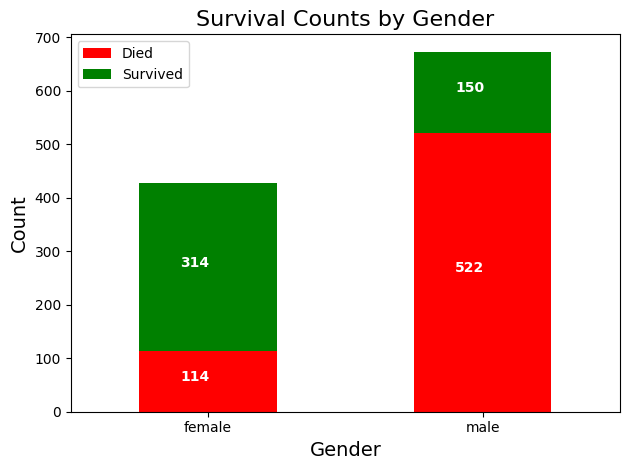

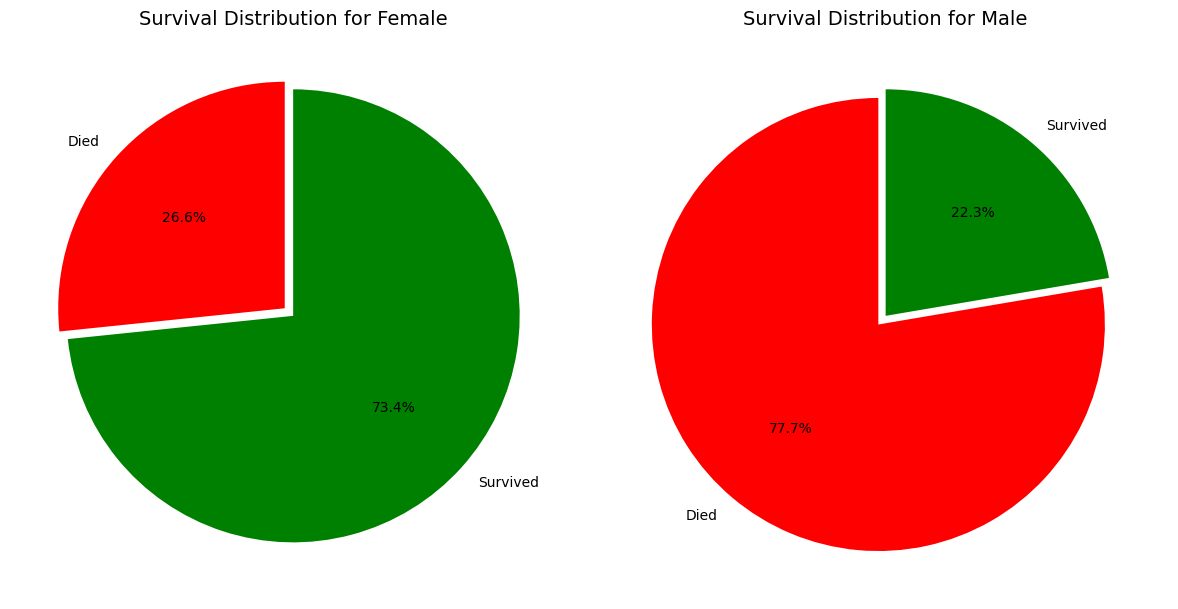

In [59]:
# Crosstab for survival based on gender
survival_by_sex = pd.crosstab(data['sex'], data['survived'],
                             rownames=['Sex'],
                             colnames=['Survived'])

survival_by_sex.columns = ['Died', 'Survived']

# Calculate survival percentages for each gender
survival_percentages = {}
for gender in data['sex'].unique():
    gender_data = data[data['sex'] == gender]
    total = len(gender_data)
    survived = sum(gender_data['survived'])  # Boolean sum gives count of survived
    died = total - survived
    survival_percentages[gender] = [died/total*100, survived/total*100]

# Stacked bar chart
plt.figure(figsize=(12, 6))
survival_by_sex.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

# Add text labels
for i in range(len(survival_by_sex.index)):
    died = survival_by_sex['Died'].iloc[i]
    survived = survival_by_sex['Survived'].iloc[i]
    plt.text(i-0.1, died/2, str(died), fontweight='bold', color='white')
    plt.text(i-0.1, died + survived/2, str(survived), fontweight='bold', color='white')

plt.tight_layout()
plt.show()

# Pie charts for survival distribution by gender
fig, axes = plt.subplots(1, len(survival_percentages), figsize=(12, 6))

if len(survival_percentages) == 1:
    axes = [axes]

for i, (gender, counts) in enumerate(survival_percentages.items()):
    axes[i].pie(counts,
                labels=['Died', 'Survived'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0),
                colors=['red', 'green'])
    axes[i].set_title(f'Survival Distribution for {gender.capitalize()}', fontsize=14)

plt.tight_layout()
plt.show()


#### iii. Correlation Between Age and Survival

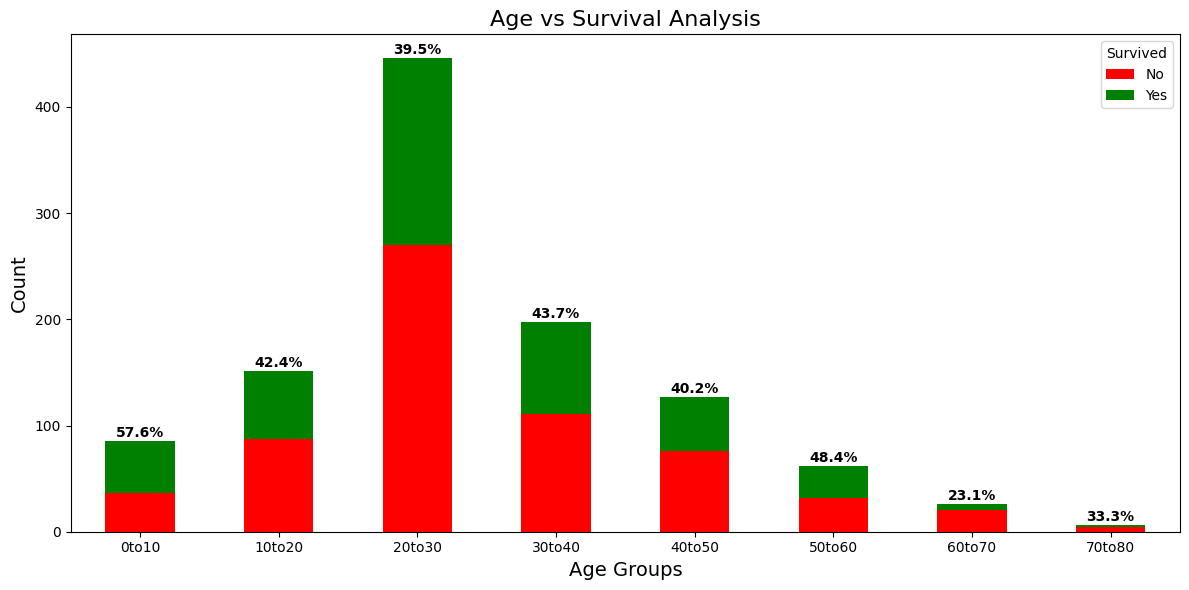

In [60]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0to10", "10to20", "20to30", "30to40", "40to50", "50to60", "60to70", "70to80"]

# Creating age groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

# Crosstab for survival based on age group
survival_by_age = pd.crosstab(data['age_group'], data['survived'])

# Plotting survival by age group
fig, ax = plt.subplots(figsize=(12, 6))
survival_by_age.plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])
plt.title('Age vs Survival Analysis', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])

# Adding percentage labels
for i, (age_group, row) in enumerate(survival_by_age.iterrows()):
    total = row.sum()
    survival_pct = (row[1] / total * 100) if total > 0 else 0
    ax.text(i, total + 1, f'{survival_pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### iv. Correlation Between Survival and Wether the Passenger is Travelling Alone

<Figure size 1200x600 with 0 Axes>

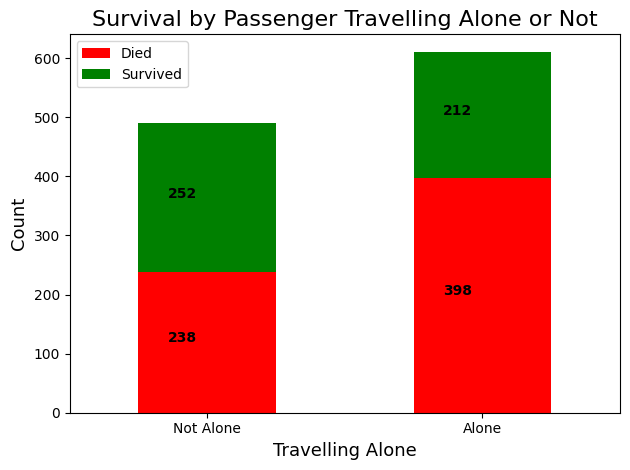

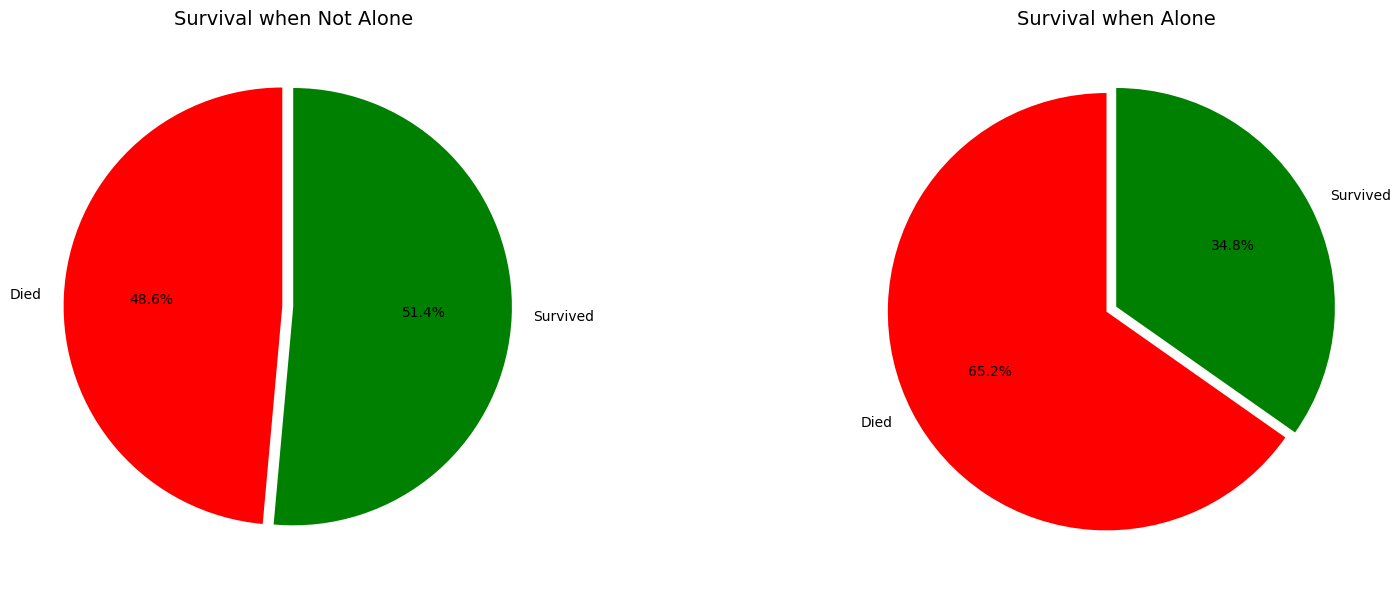

In [61]:
# Crosstab for survival based on whether passenger is alone
survival_by_is_alone = pd.crosstab(data['is_alone'], data['survived'],
                                   rownames=['Is Alone'],
                                   colnames=['Survived'])

# Rename columns for clarity
survival_by_is_alone.columns = ['Died', 'Survived']

# Calculate survival percentages
survival_percentages = {}
for is_alone in data['is_alone'].unique():
    alone_data = data[data['is_alone'] == is_alone]
    total = len(alone_data)
    survived = alone_data['survived'].sum()
    died = total - survived
    survival_percentages[is_alone] = [died / total * 100, survived / total * 100]

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
survival_by_is_alone.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival by Passenger Travelling Alone or Not', fontsize=16)
plt.xlabel('Travelling Alone', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks([0, 1], ['Not Alone', 'Alone'], rotation=0)
plt.legend(['Died', 'Survived'])

# Add labels to the bars
for i, (died, survived) in enumerate(zip(survival_by_is_alone['Died'], survival_by_is_alone['Survived'])):
    plt.text(i - 0.09, died / 2, str(died), fontweight='bold', ha='center')
    plt.text(i - 0.09, died + survived / 2, str(survived), fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# Pie charts for survival comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
labels = ['Died', 'Survived']
colors = ['red', 'green']

for i, is_alone in enumerate([0, 1]):
    axes[i].pie(survival_percentages[is_alone],
                labels=labels,
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0),
                colors=colors)
    axes[i].set_title(f'Survival when {"Not Alone" if is_alone == 0 else "Alone"}', fontsize=14)

plt.tight_layout()
plt.show()
